# Import MNE and read file

In [21]:
import mne
raw = mne.io.read_raw_edf(
    r'C:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\emotion_data\103918\103918.edf',
    #eog=['Fp1', 'Fp2'], # Define eog channels!  I suggest trying making a copy of these as eog1 and eog2 ##NOTE: YOU MUST watch the capitalization!
    misc=None, # List of channel names to be considered as miscellaneous (MISC) channels.
    stim_channel=None,  # Set to None if you don't have a stim channel
    exclude=['TimestampS', 'TimestampMs', 'OrTimestampS', 'OrTimestampMs', 'Counter', 'Interpolated', 'HighBitFlex', 
            'SaturationFlag', 'RawCq', 'Battery', 'BatteryPercent', 'MarkerHardware', 'CQ.Cz', 'CQ.Fz', 'CQ.Fp1', 
            'CQ.F7', 'CQ.F3', 'CQ.FC1', 'CQ.C3', 'CQ.FC5', 'CQ.FT9', 'CQ.T7', 'CQ.CP5', 'CQ.CP1', 'CQ.P3', 'CQ.P7', 
            'CQ.PO9', 'CQ.O1', 'CQ.Pz', 'CQ.Oz', 'CQ.O2', 'CQ.PO10', 'CQ.P8', 'CQ.P4', 'CQ.CP2', 'CQ.CP6', 'CQ.T8', 
            'CQ.FT10', 'CQ.FC6', 'CQ.C4', 'CQ.FC2', 'CQ.F4', 'CQ.F8', 'CQ.Fp2', 'CQ.Overall', 'EQ.SampleRateQua', 
            'EQ.OVERALL', 'EQ.Cz', 'EQ.Fz', 'EQ.Fp1', 'EQ.F7', 'EQ.F3', 'EQ.FC1', 'EQ.C3', 'EQ.FC5', 'EQ.FT9', 
            'EQ.T7', 'EQ.CP5', 'EQ.CP1', 'EQ.P3', 'EQ.P7', 'EQ.PO9', 'EQ.O1', 'EQ.Pz', 'EQ.Oz', 'EQ.O2', 'EQ.PO10', 
            'EQ.P8', 'EQ.P4', 'EQ.CP2', 'EQ.CP6', 'EQ.T8', 'EQ.FT10', 'EQ.FC6', 'EQ.C4', 'EQ.FC2', 'EQ.F4', 'EQ.F8', 
            'EQ.Fp2', 'MOT.TimestampS', 'MOT.TimestampMs', 'MOT.OrTimestampS', 'MOT.OrTimestampM', 'MOT.CounterMems', 
            'MOT.Interpolated', 'MOT.Q0', 'MOT.Q1', 'MOT.Q2', 'MOT.Q3', 'MOT.AccX', 'MOT.AccY', 'MOT.AccZ', 
            'MOT.MagX', 'MOT.MagY', 'MOT.MagZ'],  # Exclude channels you don't want
    preload=True,  # Preload data into memory to speed things up
    infer_types=True,  # Infer channel types from names
    verbose=False  # Set verbosity / output messages
    )


montage = mne.channels.make_standard_montage('standard_1020')  # Define the locations
raw.set_montage(montage, on_missing='ignore')  # Set locations and handle error
# raw.set_montage(montage, on_missing='raise') # Set locations and handle error
raw.set_eeg_reference(
    ref_channels = "average",
    projection = True,  # Use same settings globally
    #projection=True,  
    ch_type = "eeg",
    # ch_type = "auto",
    # forward = None,
    # joint = False,
    verbose = False
    )# Set EEG average reference and apply band-pass filter

# if apply_proj: # Use same settings globally
#     raw.apply_proj() 
raw.filter(
    l_freq=1.0, 
    h_freq=40,
    # picks=eeg_channels,
    n_jobs = 4,            
    ) # Apply bandpass filter

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


<RawEDF | 103918.edf, 32 x 144000 (1125.0 s), ~35.2 MB, data loaded>

In [45]:
for i, event in enumerate(raw.annotations):
    
    # onset: 95.373119
    # event_name:  kenMiles
    # name:  videos\1 excited\1 motorsports\kenMiles.mp4,videos\1 excited\1 motorsports\kenMiles.mp4,-1,1
    # Emotion: excited
    # End: 163.744559 rating
    # Duration 68.37144

    onset = event['onset']
    print('onset: '+str(onset))
    next = i+1
    try:
        end = raw.annotations[(next)]['onset']
        end_event = raw.annotations[(next)]['description'].split(',')[0]
        if '.mp4' in end_event:
            end_event = raw.annotations[(next)]['description'].split('\\')[-1].split('.')[0]
    except:
        end = raw.times[-1]
    try:
        event_name = (raw.annotations.description[i].split(',')[0])
        event_name = event_name.split('\\')[-1]
        event_name = event_name.split('.')[0]
        print('event_name: ',event_name)
    except:
        print('Event try failed')
        pass
    name = str(event['description'])
    print('name: ',name)
    # print('End:',end)
    try:
        emotion_name = event['description'].split('\\')[1]
        emotion_name = emotion_name.split(' ')[1]
        print('Emotion:',emotion_name)
    
    except:
        pass
    print('End:',end,end_event)
    print('Duration',str(end-onset))
    print()
    

onset: 95.373119
event_name:  kenMiles
name:  videos\1 excited\1 motorsports\kenMiles.mp4,videos\1 excited\1 motorsports\kenMiles.mp4,-1,1
Emotion: excited
End: 163.744559 rating
Duration 68.37144

onset: 163.744559
event_name:  rating
name:  rating,rating,-1,2
End: 173.284215 neutralVideo
Duration 9.53965599999998

onset: 173.284215
event_name:  neutralVideo
name:  neutralVideo,neutralVideo,-1,3
End: 238.647655 scooby
Duration 65.36344

onset: 238.647655
event_name:  scooby
name:  videos\2 happy\scooby.mp4,videos\2 happy\scooby.mp4,-1,4
Emotion: happy
End: 298.862338 rating
Duration 60.214683000000036

onset: 298.862338
event_name:  rating
name:  rating,rating,-1,5
End: 305.229921 neutralVideo
Duration 6.367582999999968

onset: 305.229921
event_name:  neutralVideo
name:  neutralVideo,neutralVideo,-1,6
End: 370.577735 motivationalAuthor
Duration 65.34781400000003

onset: 370.577735
event_name:  motivationalAuthor
name:  videos\3 motivated\motivationalAuthor.mp4,videos\3 motivated\motiv

filename:240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5
Processing file: emotion_data\103918\103918.edf
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\103918\103918raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\103918\103918raw.fif
[done]
onset: 95.373119
event_name:  kenMiles
name:  videos\1 excited\1 motorsports\kenMiles.mp4,videos\1 excited\1 motorsports\kenMiles.mp4,-1,1
Emotion: excited
End: 163.744559 rating
Duration 68.37144

filename:kenMiles
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (kenMiles) of emotion_data\103918\103918.edf to all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_Tr

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\145098\145098raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\145098\145098raw.fif
[done]
onset: 69.652827
event_name:  NBA
name:  videos\1 excited\2 sports\NBA.mp4,videos\1 excited\2 sports\NBA.mp4,-1,1
Emotion: excited
End: 139.860377 rating
Duration 70.20755

filename:NBA
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (NBA) of emotion_data\145098\145098.edf to all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\145098\145098_epoch_1_NBA_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\162636\162636raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\162636\162636raw.fif
[done]
onset: 82.68495
event_name:  ratatChaseScene
name:  videos\1 excited\3 general\ratatChaseScene.mp4,videos\1 excited\3 general\ratatChaseScene.mp4,-1,1
Emotion: excited
End: 151.501829 rating
Duration 68.81687899999999

filename:ratatChaseScene
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (ratatChaseScene) of emotion_data\162636\162636.edf to all_plots\240930_1

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 1 ICA component
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\192176\192176raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\192176\192176raw.fif
[done]
onset: 72.55919
event_name:  kenMiles
name:  videos\1 excited\1 motorsports\kenMiles.mp4,1,-1,1
Emotion: excited
End: 140.985311 label
Duration 68.426121

filename:kenMiles
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (kenMiles) of emotion_data\192176\192176.edf to all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\192176\192176_epoch_1_kenMiles_psd.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 1 ICA component
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\222299\222299raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\222299\222299raw.fif
[done]
onset: 69.832466
event_name:  ratatChaseScene
name:  videos\1 excited\3 general\ratatChaseScene.mp4,1,-1,1
Emotion: excited
End: 138.555487 label
Duration 68.723021

filename:ratatChaseScene
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (ratatChaseScene) of emotion_data\222299\222299.edf to all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\222299\222

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\254362\254362raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\254362\254362raw.fif
[done]
onset: 84.419308
event_name:  kenMiles
name:  videos\1 excited\1 motorsports\kenMiles.mp4,videos\1 excited\1 motorsports\kenMiles.mp4,-1,1
Emotion: excited
End: 152.806369 rating
Duration 68.38706099999999

filename:kenMiles
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (kenMiles) of emotion_data\254362\254362.edf to all_plots\240930_155404mt_0.6eogt_4db_True_n

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\265350\265350raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\265350\265350raw.fif
[done]
onset: 60.816353
event_name:  NBA
name:  videos\1 excited\2 sports\NBA.mp4,videos\1 excited\2 sports\NBA.mp4,-1,1
Emotion: excited
End: 131.125494 rating
Duration 70.30914100000001

filename:NBA
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (NBA) of emotion_data\265350\265350.edf to all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\265350\265350_epo

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 2 ICA components
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\479015\479015raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\479015\479015raw.fif
[done]
onset: 65.426058
event_name:  kenMiles
name:  videos\1 excited\1 motorsports\kenMiles.mp4,1,-1,1
Emotion: excited
End: 133.766364 label
Duration 68.34030600000001

filename:kenMiles
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (kenMiles) of emotion_data\479015\479015.edf to all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\479015\479015_epoch_1_ken

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 3 ICA components
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\541414\541414raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\541414\541414raw.fif
[done]
onset: 73.379523
event_name:  NBA
name:  videos\1 excited\2 sports\NBA.mp4,1,-1,1
Emotion: excited
End: 143.70417 label
Duration 70.324647

filename:NBA
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (NBA) of emotion_data\541414\541414.edf to all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\541414\541414_epoch_1_NBA_psd.png
Writing c:\Users\mw24396\

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\580357\580357raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\580357\580357raw.fif
[done]
onset: 73.410862
event_name:  NBA
name:  videos\1 excited\2 sports\NBA.mp4,1,-1,1
Emotion: excited
End: 143.563707 label
Duration 70.152845

filename:NBA
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (NBA) of emotion_data\580357\580357.edf to all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\580357\580357_epoch_1_NBA_psd.png
Writing c:\Users\mw24396

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 2 ICA components
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\598027\598027raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\598027\598027raw.fif
[done]
onset: 81.278451
event_name:  kenMiles
name:  videos\1 excited\1 motorsports\kenMiles.mp4,1,-1,1
Emotion: excited
End: 149.751425 label
Duration 68.47297400000001

filename:kenMiles
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (kenMiles) of emotion_data\598027\598027.edf to all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\598027\598027_epoch_1_ken

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\665252\665252raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\665252\665252raw.fif
[done]
onset: 84.317882
event_name:  NBA
name:  videos\1 excited\2 sports\NBA.mp4,videos\1 excited\2 sports\NBA.mp4,-1,1
Emotion: excited
End: 154.470799 rating
Duration 70.152917

filename:NBA
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (NBA) of emotion_data\665252\665252.edf to all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\665252\665252_epoch_1_NBA

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\687106\687106raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\687106\687106raw.fif
[done]
onset: 67.613637
event_name:  ratatChaseScene
name:  videos\1 excited\3 general\ratatChaseScene.mp4,videos\1 excited\3 general\ratatChaseScene.mp4,-1,1
Emotion: excited
End: 136.430474 rating
Duration 68.816837

filename:ratatChaseScene
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (ratatChaseScene) of emotion_data\687106\687106.edf to all_plots\240930_155404mt

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 1 ICA component
    Projecting back using 32 PCA components
Writing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\712563\712563raw.fif
Closing c:\Users\mw24396\OneDrive - Georgia Southern University\1_EEG\1_ Senior_Capstone\Emotional_Analysis\emotional_analysis\all_plots\240930_155404mt_0.6eogt_4db_True_nrmlizd_True_cmp_5\712563\712563raw.fif
[done]
onset: 69.230844
event_name:  kenMiles
name:  videos\1 excited\1 motorsports\kenMiles.mp4,videos\1 excited\1 motorsports\kenMiles.mp4,-1,1
Emotion: excited
End: 137.688202 rating
Duration 68.45735799999999

filename:kenMiles
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Saved PSD plot for epoch 1 (kenMiles) of emotion_data\712563\712563.edf to all_plots\240930_155404mt_0.6eogt_4db_True_nr

KeyboardInterrupt: 

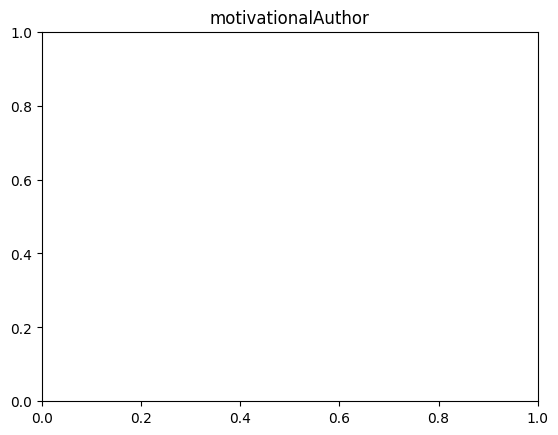

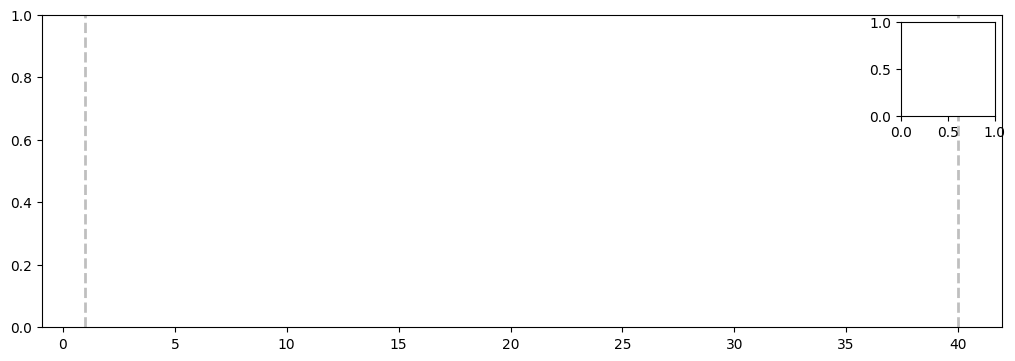

In [44]:
muscle_threshold = 0.6 #0.5
eog_threshold = 4 #3
apply_proj = False #Use same settings globally
plot_psd = True # Generate and save PSD plots?
plot_ica_overlay = False # Plot before and after effects of ica cleaning
plot_topomap = True
dB = True
normalize = True
n_components = 5
output_directory = 'all_plots'
description = f'mt_{muscle_threshold}eogt_{eog_threshold}db_{dB}_nrmlizd_{normalize}_cmp_{n_components}'  # Put a nice description here as it gets saved in the output directory name and code output file
save_fif = True

import os  # Handy OS functions, explore file directory, etc.
import glob  # Useful to grab the EDF files easily
import mne  # The main eeg package / library
import matplotlib.pyplot as plt  # Use as backend when needed
from datetime import datetime  # To time & date stamp output files as needed
import re  # To sanitize filename
from mne.preprocessing import ICA  # Import it explicitly to minimize required code and refer to it more easily

eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']
eog_channels=['Fp1', 'Fp2']

## NOTES:
# Try and edit required z scores for the data, as it will affect filtering a lot!
# the EOG indicies and such
# may be nice to iterate through variations and plot them!

def sanitize_filename(filename):
    
    print(f'filename:{filename}')
    ### Sanitize the filename to remove or replace invalid characters
    return re.sub(r'[\\/*?:"<>|,]', '_', filename)

def save_script_copy(script_path, output_directory):
    ## Save a copy of the script in the output directory
    sanitized_description = sanitize_filename(description)
    script_name = os.path.basename(script_path).replace('.py', f'_{sanitized_description}.py')
    output_path = os.path.join(output_directory, script_name)
    with open(script_path, 'r') as original_script:
        with open(output_path, 'w') as copy_script:
            copy_script.write(original_script.read())
    print(f"Saved a copy of the script to {output_path}")

def generate_plots(edf_file, output_directory):
    try:
        raw = mne.io.read_raw_edf(
            edf_file,
            #eog=['Fp1', 'Fp2'], # Define eog channels!  I suggest trying making a copy of these as eog1 and eog2 ##NOTE: YOU MUST watch the capitalization!
            misc=None, # List of channel names to be considered as miscellaneous (MISC) channels.
            stim_channel=None,  # Set to None if you don't have a stim channel
            exclude=['TimestampS', 'TimestampMs', 'OrTimestampS', 'OrTimestampMs', 'Counter', 'Interpolated', 'HighBitFlex', 
                    'SaturationFlag', 'RawCq', 'Battery', 'BatteryPercent', 'MarkerHardware', 'CQ.Cz', 'CQ.Fz', 'CQ.Fp1', 
                    'CQ.F7', 'CQ.F3', 'CQ.FC1', 'CQ.C3', 'CQ.FC5', 'CQ.FT9', 'CQ.T7', 'CQ.CP5', 'CQ.CP1', 'CQ.P3', 'CQ.P7', 
                    'CQ.PO9', 'CQ.O1', 'CQ.Pz', 'CQ.Oz', 'CQ.O2', 'CQ.PO10', 'CQ.P8', 'CQ.P4', 'CQ.CP2', 'CQ.CP6', 'CQ.T8', 
                    'CQ.FT10', 'CQ.FC6', 'CQ.C4', 'CQ.FC2', 'CQ.F4', 'CQ.F8', 'CQ.Fp2', 'CQ.Overall', 'EQ.SampleRateQua', 
                    'EQ.OVERALL', 'EQ.Cz', 'EQ.Fz', 'EQ.Fp1', 'EQ.F7', 'EQ.F3', 'EQ.FC1', 'EQ.C3', 'EQ.FC5', 'EQ.FT9', 
                    'EQ.T7', 'EQ.CP5', 'EQ.CP1', 'EQ.P3', 'EQ.P7', 'EQ.PO9', 'EQ.O1', 'EQ.Pz', 'EQ.Oz', 'EQ.O2', 'EQ.PO10', 
                    'EQ.P8', 'EQ.P4', 'EQ.CP2', 'EQ.CP6', 'EQ.T8', 'EQ.FT10', 'EQ.FC6', 'EQ.C4', 'EQ.FC2', 'EQ.F4', 'EQ.F8', 
                    'EQ.Fp2', 'MOT.TimestampS', 'MOT.TimestampMs', 'MOT.OrTimestampS', 'MOT.OrTimestampM', 'MOT.CounterMems', 
                    'MOT.Interpolated', 'MOT.Q0', 'MOT.Q1', 'MOT.Q2', 'MOT.Q3', 'MOT.AccX', 'MOT.AccY', 'MOT.AccZ', 
                    'MOT.MagX', 'MOT.MagY', 'MOT.MagZ'],  # Exclude channels you don't want
            preload=True,  # Preload data into memory to speed things up
            infer_types=True,  # Infer channel types from names
            verbose=False  # Set verbosity / output messages
            )
        
        raw.pick(eeg_channels)  # Pick only EEG channels
        montage = mne.channels.make_standard_montage('standard_1020')  # Define the locations
        raw.set_montage(montage, on_missing='ignore')  # Set locations and handle error
        # raw.set_montage(montage, on_missing='raise') # Set locations and handle error
        raw.set_eeg_reference(
            ref_channels = "average",
            projection = apply_proj,  # Use same settings globally
            #projection=True,  
            ch_type = "eeg",
            # ch_type = "auto",
            # forward = None,
            # joint = False,
            verbose = False
            )# Set EEG average reference and apply band-pass filter
        
        if apply_proj: # Use same settings globally
            raw.apply_proj() 
        raw.filter(
            l_freq=1.0, 
            h_freq=40,
            # picks=eeg_channels,
            n_jobs = 4,            
            ) # Apply bandpass filter
        
        #         l_freq: Any,
        #     h_freq: Any,
        #     picks: Any | None = None,
        #     filter_length: str = "auto",
        #     l_trans_bandwidth: str = "auto",
        #     h_trans_bandwidth: str = "auto",
        #     n_jobs: Any | None = None,
        #     method: str = "fir",
        #     iir_params: Any | None = None,
        #     phase: str = "zero",
        #     fir_window: str = "hamming",
        #     fir_design: str = "firwin",
        #     skip_by_annotation: Any = ("edge", "bad_acq_skip"),
        #     pad: str = "reflect_limited",
        #     verbose: Any | None = None
        # ) -> (BaseRaw | FilterMixin | _BaseSourceEstimate)

        # Set up ICA
        ica = ICA(
            # n_components=30,
            n_components=n_components,
            #noise_cov = 
            #method =
            # fit_params = 
            random_state=97,
            max_iter=800,
            # max_iter="auto",
            )
         
        ica.fit(
            inst = raw,
            picks = eeg_channels,
            # start =,
            # stop =,
            # decim =,
            # reject =,
            # flat =,
            tstep = 2,
            # reject_by_annotation = True,
            verbose = False,
            )

        # Find EOG and muscle artifacts
        eog_indices, eog_scores = ica.find_bads_eog(
            raw, 
            ch_name=eog_channels,
            threshold = eog_threshold,
            measure = "zscore",
            verbose = False
            )  # Define EOG indicies and scores
        
        muscle_noise_indices, muscle_noise_scores = ica.find_bads_muscle(
            inst= raw,
            threshold = muscle_threshold,
            # start: Any | None = None,
            # stop: Any | None = None,
            # l_freq: int = 7,
            # h_freq: int = 45,
            # sphere: Any | None = None,
            verbose= False
            )
        subfolder_name = os.path.basename(edf_file)[:6]
        subfolder_path = os.path.join(output_directory, subfolder_name)
        os.makedirs(subfolder_path, exist_ok=True)
        # Exclude the identified artifact components
        ica.exclude = list(set(eog_indices + muscle_noise_indices)) # NOTE: This excludes a lot!  Can set this to be more or less
        
        # Apply ICA to the raw data
        raw_clean = ica.apply(raw.copy())
        
        if save_fif:
        
            fif_output_filename = f"{os.path.basename(edf_file).replace('.edf', '').replace('.bdf', '')}raw.fif"
            fif_output_path = os.path.join(subfolder_path, fif_output_filename)
            ## NOTE: ML & AI TEAM pay attention here
            raw_clean.save(##TODO: Implement saving here
                fif_output_path, 
                # picks=None, 
                tmin=0, 
                tmax=None, 
                buffer_size_sec=None, 
                drop_small_buffer=False, 
                proj=apply_proj, # Use same settings globally
                fmt='single', 
                overwrite=False, 
                split_size='2GB', 
                split_naming='neuromag', 
                verbose=None
                )
    
        # # Loop through each event and plot PSD
        # for i, event in enumerate(events):
        #     event_id = event[-1]
        #     event_name = list(event_dict.keys())[list(event_dict.values()).index(event_id)]
        #     event_name = re.search(r'\\([^\\]+)\.(mp4|mkv)', event_name)
        #     event_name = event_name.group(1)
        #     # Define the time span for the event
        #     start = event[0] / raw.info['sfreq'] #start, stop = event[0] / raw.info['sfreq'], min((event[0] + raw.n_times) / raw.info['sfreq'], raw.times[-1])
        #     start = start + 15
        #     stop = start + 44
        for i, event in enumerate(raw.annotations):
            
            # onset: 95.373119
            # event_name:  kenMiles
            # name:  videos\1 excited\1 motorsports\kenMiles.mp4,videos\1 excited\1 motorsports\kenMiles.mp4,-1,1
            # Emotion: excited
            # End: 163.744559 rating
            # Duration 68.37144

            onset = event['onset']
            start =  onset
            print('onset: '+str(onset))
            next = i+1
            try:
                end = raw.annotations[(next)]['onset']
                stop = end
                end_event = raw.annotations[(next)]['description'].split(',')[0]
                if '.mp4' in end_event:
                    end_event = raw.annotations[(next)]['description'].split('\\')[-1].split('.')[0]
            except:
                end = raw.times[-1]
            try:
                event_name = (raw.annotations.description[i].split(',')[0])
                event_name = event_name.split('\\')[-1]
                event_name = event_name.split('.')[0]
                print('event_name: ',event_name)
            except:
                print('Event try failed')
                pass
            name = str(event['description'])
            print('name: ',name)
            # print('End:',end)
            try:
                emotion_name = event['description'].split('\\')[1]
                emotion_name = emotion_name.split(' ')[1]
                print('Emotion:',emotion_name)
            
            except:
                pass
            print('End:',end,end_event)
            print('Duration',str(end-onset))
            print()
                        
            try:
                cropped_raw = raw_clean.copy().crop(tmin=start, tmax=stop)# Crop the raw data to the event span
            except:
                # try:
                #     cropped_raw = raw_clean.copy().crop(tmin=start, tmax=stop-5)
                # except:
                print('Start:',start,' End: ',stop)
                cropped_raw = raw_clean.copy().crop(tmin=start)
                event_name = event_name + str(start) + 'shortened'
                test = input('Press enter to coninue')
           
            
            sanitized_event_name = sanitize_filename(event_name)
            # Determine subfolder based on the first 6 characters of the filename
            subfolder_name = os.path.basename(edf_file)[:6]
            subfolder_path = os.path.join(output_directory, subfolder_name)
            os.makedirs(subfolder_path, exist_ok=True)
            # Add title to the plot
            plt.title(f"{event_name}")
            
            # Save the plot to a PNG file
            psd_output_filename = f"{os.path.basename(edf_file).replace('.edf', '').replace('.bdf', '')}_epoch_{i + 1}_{sanitized_event_name}_psd.png"
            psd_output_path = os.path.join(subfolder_path, psd_output_filename)
            psd_fig = cropped_raw.compute_psd(picks=eeg_channels, fmin=1, fmax=40).plot(
                dB=dB, 
                show=False)  # Set dB=False here
            psd_fig.savefig(psd_output_path)
            plt.close(psd_fig)  # Close the figure to free up memory
            print(f"Saved PSD plot for epoch {i + 1} ({sanitized_event_name}) of {edf_file} to {psd_output_path}")
            
            # Save the plot to a PNG file
            ica_output_filename = f"{os.path.basename(edf_file).replace('.edf', '').replace('.bdf', '')}_epoch_{i + 1}_{sanitized_event_name}_ica_overlay.png"
            ica_output_path = os.path.join(subfolder_path, ica_output_filename)
            # Plot ICA overlay for the cropped raw data
            plt.title(f"{event_name}")
            if plot_ica_overlay:
                try: # NOTE: Failure causes raised exception!!
                    ica_fig = ica.plot_overlay(
                        cropped_raw, 
                        # exclude=ica.exclude, 
                        picks=eeg_channels, 
                        start = start, 
                        stop = stop,
                        title = event_name,
                        show=False,
                        # n_pca_components = 32,
                        )# on_baseline = None
                    
                    ica_fig.savefig(ica_output_path)
                    plt.close(ica_fig)  # Close the figure to free up memory
                    # print(f"Saved ICA overlay plot for epoch {i + 1} ({sanitized_event_name}) of {edf_file} to {ica_output_path}")
                except Exception as e:
                    print(e)
            ##NOTE: ML & AI Team, please pay close attention here
            if save_fif:
                fif_output_filename = f"{os.path.basename(edf_file).replace('.edf', '').replace('.bdf', '')}_epoch_{i + 1}_{sanitized_event_name}raw.fif"
                fif_output_path = os.path.join(subfolder_path, fif_output_filename)
                
                cropped_raw.save(##TODO: Implement saving here
                    fif_output_path, 
                    # picks=None, 
                    tmin=0, 
                    tmax=None, 
                    buffer_size_sec=None, 
                    drop_small_buffer=False, 
                    proj=apply_proj, # Use same settings globally
                    fmt='single', 
                    overwrite=False, 
                    split_size='2GB', 
                    split_naming='neuromag', 
                    verbose=None
                    )
            
            # Plot the PSD for the cropped raw data
            # try:
            topo_fig = cropped_raw.compute_psd(fmin=1, fmax=40).plot_topomap(
                ch_type="eeg",
                normalize=normalize,  #NOTE: KEY!!!
                sensors=True, 
                # names=None, 
                mask=None, 
                mask_params=None, 
                contours=6, 
                outlines='head', 
                sphere=None, 
                image_interp='cubic', #'nearest' 'linear'
                extrapolate='auto', 
                border='mean', 
                res=64, 
                size=1, 
                # cmap='RdBu_r', 
                # cmap='viridis', 
                # cmap='plasma', 
                # cmap='inferno', 
                # cmap='magma', 
                # cmap='cividis', 
                cmap='Spectral_r', 
                vlim=(None, None), 
                cnorm=None, 
                axes=None, 
                show=False, 
                )
                

            # # Add title to the plot
            # plt.title(f"{event_name}")
            plt.title(f"{event_name}")
            # Save the plot to a PNG file
            topo_output_filename = f"{os.path.basename(edf_file).replace('.edf', '').replace('.bdf', '')}_epoch_{i + 1}_{sanitized_event_name}_psd_topomap.png"
            topo_output_path = os.path.join(subfolder_path, topo_output_filename)
            topo_fig.savefig(topo_output_path)
            plt.close(topo_fig)  # Close the topo_figure to free up memory
            print(f"Saved PSD plot for epoch {i + 1} ({sanitized_event_name}) of {edf_file} to {topo_output_path}")
            # except:
            #     pass

    except Exception as e:
        print(f"Error processing {edf_file}: {e}")


def find_edf_files(parent_directory):  # Self explanatory, let's grab every EDF file and process it
    extensions = ['*.bdf', '*.edf', '*.edf+']
    edf_files = []
    for ext in extensions:
        edf_files.extend(glob.glob(os.path.join(parent_directory, '**', ext), recursive=True))
    return edf_files

def main(parent_directory, output_directory):
    edf_files = find_edf_files(parent_directory)  # Grab EDF files

    for edf_file in edf_files:  # Process EDF files one at a time
        print(f"Processing file: {edf_file}")
        generate_plots(edf_file, output_directory)
        # if plot_ica_overlay:
        #     # plot_ica_overlay(edf_file, output_directory)
        # if plot_psd:
        #     generate_plots(edf_file, output_directory)
        # if plot_topomap:
        #     plot_topomap(edf_file, output_directory)
if __name__ == '__main__':
    parent_directory = 'emotion_data'

    # Create a timestamped subfolder in the output directory
    timestamp = datetime.now().strftime('%y%m%d_%H%M%S')
    timestamped_output_directory = os.path.join(output_directory, sanitize_filename(timestamp + description))
    os.makedirs(timestamped_output_directory, exist_ok=True)
    
    # Save a copy of the script in the output directory for a verbatim record of code that produced the relevant graphs
    # save_script_copy(__file__, timestamped_output_directory)
    main(parent_directory, timestamped_output_directory)